Accuracy:  0.88

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



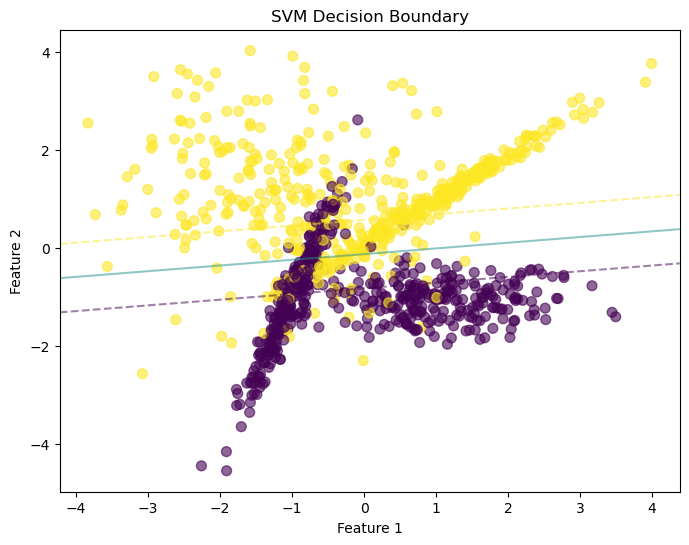

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import numpy as np
X,y=make_classification(n_samples=1000,n_features=2,n_informative=2,
n_redundant=0,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
s=SVC(kernel='linear')
s.fit(X_train,y_train)
y_pred = s.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print("Accuracy: ",ac)
report=classification_report(y_test,y_pred)
print("\nClassification Report")
print(report)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',s=50,alpha=0.6) #plots initial coordinates
ax=plt.gca()
xlimit=ax.get_xlim()
ylimit=ax.get_ylim()
# xlimit,ylimit
xx,yy=np.meshgrid(np.linspace(xlimit[0],xlimit[1],100),np.linspace(ylimit[0],ylimit[1],100))
z=s.decision_function(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contour(xx,yy,z,levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()